# Assignment for Fixing income

February 2019

## Single curve
In this part I worked with two equations, which are:
Fixed leg
for maturity below 1 year:

$$ V^{ois,f} = k\delta Z\left( t, T \right) $$

and for maturity above 1 year:

$$ V^{ois,f} = k \sum_{i=1}^{N} \delta_{i} Z\left( t, T_{i}\right) $$

Compunding leg

$$ V^{ois,c} = \sum_{i=1}^{N} \delta_{i} Z\left( t, T_{i}\right) \frac{1}{\delta_{i}} \left( \frac{Z\left( t, T_{i-1}\right)}{Z\left( t, T_{i}\right) } - 1 \right) $$

The calibrated curve using the following swap values and using the loglinear interpolation is

In [1]:
print(0.1, 0.15, 0.23, 0.32, 0.4, 0.5, 0.7,
                      0.8, 0.9, 1.0, 1.2, 1.3, 1.5, 1.8, 1.9, 2.1, "%")

0.1 0.15 0.23 0.32 0.4 0.5 0.7 0.8 0.9 1.0 1.2 1.3 1.5 1.8 1.9 2.1 %


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 17 16:41:12 2019

@author: pedro
"""

from bound import *
from curves_assignment_2_students import *
from fixed_income import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.stats as st
import pandas as pd
import scipy.optimize as sco


# def d_file(file_name, df, table_Title = None, center = True, longtable = None):
#     """
#     takes a pandas DataFrame and creates a file_name.tex with LaTeX table data
#     file_name: name of the file;
#     df: Data Frame;
#     table_Title: title of the table to latex;
#     center: centering the table in latex;
#     longtable: Put tables with large rows in latex
#     Remark: if longtable == True so center and table_Title will not work.
#     """
#     # create and open file
#     text_file = open(file_name, "w")
#     # data frame to LaTeX
#     if longtable != True:
#         ##
#         if table_Title != None and center == True:
#             df_latex = '\\begin{table}[H]\n\centering\n' + '\\caption{'+ table_Title + '}\\\n' + df.to_latex() + '\\end{table}\n' 
#         else:
#             if  table_Title != None:
#                 df_latex = '\\begin{table}[H]\n' + '\\caption{'+ table_Title + '}\n' + df.to_latex() + '\\end{table}\n' 
#             else:
#                 df_latex = '\\begin{table}[H]\n' +  df.to_latex() + '\\end{table}\n'  
    
#     else:
#         ##
#         df_aux = df.to_latex(longtable = longtable)
#         if table_Title != None:
#             df_latex = df_aux[:22] + "\\caption{" + table_Title + "}\\\ \n" + df_aux[22:]
        
#         if center == True:
#             df_latex = "\\begin{center} \n" + df_latex + "\\end{center}"

#     # Consider extensions (see later in class)
#     # write latex string to file
#     text_file.write(df_latex)
#     # close file
#     text_file.close()

# Script
# maturity dates
maturities = np.concatenate((np.arange(0.0, 12.1), np.arange(15.0, 30.1, 5.0)))
# start with constant guess
df = np.ones(len(maturities))
df[1:] = np.exp(-0.02*maturities[1:])
z_curve = Curve(maturities, df, InterpolationLoglinear)
# check



# calibrate
ois_rates = np.array([0.1, 0.15, 0.23, 0.32, 0.4, 0.5, 0.7,
                      0.8, 0.9, 1.0, 1.2, 1.3, 1.5, 1.8, 1.9, 2.1])/100.0
f = fsolve(ois_swaps, -np.log(df[1:])/maturities[1:], args=(maturities, ois_rates))

df[1:] = np.exp(-f*maturities[1:])
z_curve = Curve(maturities, df, InterpolationLoglinear)
# check

fig1 = plt.figure(1)
plt.plot(maturities,z_curve(maturities))
plt.title("Calibrated Discount Curve", fontweight='bold')
plt.legend(["Discount"])
plt.xlabel("Time")
plt.ylabel("Price")
plt.grid()
plt.show()


<Figure size 640x480 with 1 Axes>

The loglinear interporlation is defined by:

$$ Z\left(0,T+1 \right) = Z\left(0,T \right) e^{ -f_{T:T+\Delta T} \times \left( T+ \Delta T \right)} $$

Where the forward rate or f is:

$$ f_{T:T+\Delta T} = \left( \frac{Z\left( 0, T\right)}{Z\left( 0, T+\Delta T \right) } - 1 \right) \frac{1}{\delta(T, T+\Delta T)} $$

The yield curve is defined

$$ Yield = \frac{-log\left( Z \right)}{ T-t } $$

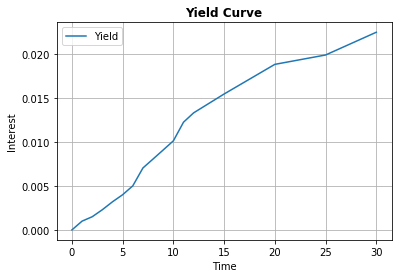

In [3]:
yd = np.zeros(len(maturities))
yd[1:] = f

fig1 = plt.figure(1)
plt.plot(maturities,yd)
plt.title("Yield Curve", fontweight='bold')
plt.legend(["Yield"])
plt.xlabel("Time")
plt.ylabel("Interest")
plt.grid()
plt.show()

The approximate forward rate curve

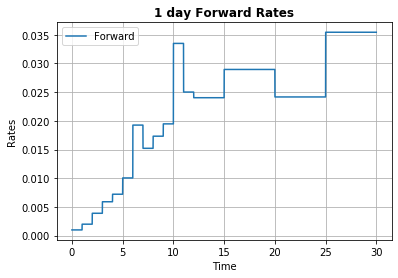

In [4]:
fow = forward(maturities, z_curve)

mat = np.arange(0,365*30,1)/365
fw_1d = pd.DataFrame(forward(mat, z_curve), index = mat[1:], columns = ['Dayle Forward'])

fig1 = plt.figure(1)
plt.plot(fw_1d)
plt.title("1 day Forward Rates", fontweight='bold')
plt.legend(["Forward"])
plt.xlabel("Time")
plt.ylabel("Rates")
plt.grid()
plt.show()

The fixed floating swaps for a single discount curve and rates equal to 2%, 2.5%, and 3% are shown in the next
graph.

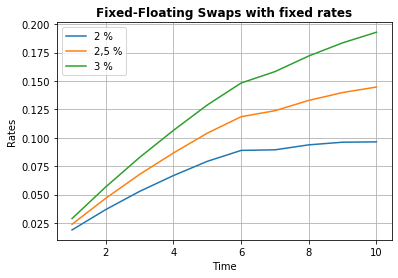

In [5]:

curves_for_dif_rates = []
for i in np.array([0.02,0.025,0.03]):
    curves_for_dif_rates.append(ois_swaps(f[:10],maturities[:11],i))
    

ff_1 =pd.DataFrame(curves_for_dif_rates, index = ['2 %','2,5 %','3 %'], columns = maturities[1:11]).T

fig1 = plt.figure(1)
plt.plot(ff_1)
plt.title("Fixed-Floating Swaps with fixed rates", fontweight='bold')
plt.legend(['2 %','2,5 %','3 %'])
plt.xlabel("Time")
plt.ylabel("Rates")
plt.grid()
plt.show()

The values for a fixed-floating swap with maturity equal to 10 years and fixed rates equal to 2%, 2.5%,
3% are

In [6]:
#d_file("ff1", round(ff_1.iloc[-1].to_frame("10 Years (%)")*100,2), "Fixed floating swaps in percentage", longtable = True)
print(round(ff_1.iloc[-1].to_frame("10 Years (%)")*100,2))


       10 Years (%)
2 %            9.64
2,5 %         14.46
3 %           19.28


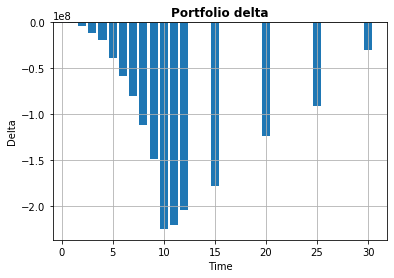

In [7]:
liabilities = np.array([1, 2, 4, 5, 8, 10, 12, 15, 18,25, 23, 20, 15, 9, 6, 2])*1000000 # millions

port_value = liabilities*z_curve(maturities[1:])

h =0.000001

df_change = np.exp(-(f+h)*maturities[1:])

delta = (liabilities*df_change - port_value)/h

fig1 = plt.figure(1)
plt.bar(maturities[1:],delta)
plt.title("Portfolio delta", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Delta")
plt.grid()
plt.show()

# Multi Curve

For the multi curve I used three other functions, which are:

$$ V^{fix}(t) = K \sum_{i=0}^{N-1} \delta_{i}^{fix} Z\left( t, T_{i+1}\right) $$

$$ V^{flo,6m}(t) = \sum_{j=0}^{2N-1} \delta_{j}^{flo} Z\left( t, T_{i+1}\right)F_{6moths}\left(t : T_{j}, T_{j+1} \right) $$

$$ V^{flo,3m}(t) = \sum_{j=0}^{4N-1} \delta_{l}^{flo} Z\left( t, T_{l+1}\right)F_{3moths}\left(t : T_{l}, T_{l+1} \right) $$

The $F_{xmoths}\left(t : T_{l}, T_{l+1} \right)$ is the forward formula defined above.

The discount curve for a year, 6 months and 3 months are shown in the next graph

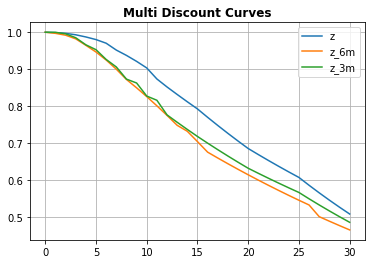

In [8]:
# =============================================================================
# Multi curve
# =============================================================================

fixed_rates = np.array([0.3, 0.4, 0.6, 0.9, 1.1, 1.3, 1.5, 1.7, 1.8, 1.9, 2.0, 2.1,
                        2.2, 2.2, 2.3, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4, 2.4,
                        2.4, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5, 2.5]) / 100.0
##
    
maturities_fixed = np.arange(0.0,31.0,1.0)    
fwd = forward(maturities_fixed, z_curve)

f_6m = fsolve(fixed_floating_swaps, fwd, args = (maturities_fixed,fixed_rates, z_curve))
n_f=None


nw_df =  np.ones(len(maturities_fixed))
nw_df[1:] = np.exp(-f_6m*maturities_fixed[1:])

# check
z_6 = Curve(maturities_fixed, nw_df, InterpolationLoglinear)


# fig1 = plt.figure(1)
# ax1 = fig1.add_subplot(111)
# l2, = plt.plot(maturities_fixed,z_curve(maturities_fixed) , label='year')
# l1, = plt.plot(maturities_fixed,z_6(maturities_fixed), label='6m')
# #l3 =  plt.plot(z3, label='z3')
# ax1.legend()
# ax1.grid()
# ax1.set_title('Discount Curves', fontweight='bold')
# plt.show()

d = -10.0
tenor_spreads = (np.array([19.0, 19.0, 18.0, 18.0, 17.0, 16.0, 15.0, 14.0,
                          13.0, 12.0, 12.0, 11.0, 10.0, 9.0, 8.0, 8.0]) - d) / 10000.0

df_3m = np.ones(len(maturities))
df_3m[1:] = np.exp(-0.2*maturities[1:])


f_3m = fsolve(tenor_basis_swaps, -np.log(df_3m[1:])/maturities[1:],
              args=(maturities, tenor_spreads, z_curve, z_6))

df_3m = np.ones(len(maturities))
df_3m[1:] = np.exp(-f_3m*maturities[1:])
z_3m_curve = Curve(maturities, df_3m, InterpolationLoglinear)

z_eonia = z_curve(maturities_fixed)
z_6m = z_6(maturities_fixed)
z_3m = z_3m_curve(maturities_fixed)

# plot discount curves
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
l1, = plt.plot(maturities_fixed, z_eonia, label='z')
l2, = plt.plot(maturities_fixed, z_6m, label='z_6m')
l3, = plt.plot(maturities_fixed, z_3m, label='z_3m')
ax1.legend()
ax1.grid()
ax1.set_title('Multi Discount Curves', fontweight='bold')
plt.show()


The swap rates are shown in the next graph

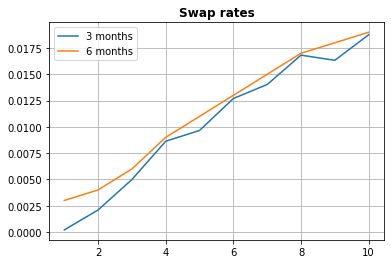

In [9]:
swp_3months = swap_rate(f_3m[:10], maturities_fixed[:11], z_curve, f_time = 3)
swp_6months = swap_rate(f_6m[:10], maturities_fixed[:11], z_curve, f_time = 6)

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
l1, = plt.plot(maturities_fixed[1:11],swp_3months, label='3 months')
l2, = plt.plot(maturities_fixed[1:11], swp_6months, label='6 months')
ax1.legend()
ax1.grid()
ax1.set_title('Swap rates', fontweight='bold')
plt.show()

The tenor basis swaps for 10 years are shown in the next table.

In [10]:

swap_ml = round(pd.DataFrame(tenor_basis_swaps(f_3m[:10], maturities[:11], 0.013, z_curve, z_6), index = maturities[1:11], columns = ["Tenor basis"])*100,2)
print(swap_ml)

      Tenor basis
1.0          1.01
2.0          2.02
3.0          3.05
4.0          4.06
5.0          5.11
6.0          6.18
7.0          7.24
8.0          8.31
9.0          9.38
10.0        10.45


# xABR models and Hagen model

In this part the ZABR model have a problem when F = K. To solve this
problem the following must done:

.

$$ \lim_{F\rightarrow K} \frac{F - K}{x_{t}} $$

.

$$ x_{t} = \frac{1}{ \epsilon } ln\left( \frac{J \left( y_{t}\right) - \rho + \epsilon y_{t}}{1 - \rho } \right) $$

.

$$ J \left( y_{t}\right) = \left(1 + \epsilon^2 y_{t}^2 - 2 \rho\epsilon y_{t} \right)^{0.5} $$

.

$$ y_{t} = \frac{1}{\sigma_{0} z_{t}} \frac{S_{t}^{1-\beta} - K^{1-\beta}}{1-\beta} $$

Note that if $y_{t} = 0$ then $J \left( y_{t}\right)$ = 1 and $x_{t} = 0$. Then we have the following situation $ \lim_{F\rightarrow K} \frac{F - K}{x_{t}} = \frac{0}{0}$.

The parts of the fraction are differentiable, therefore it is possible to use the L'Hôpita rule to find a solution for this limit.

.

$$ \lim_{F\rightarrow K} \frac{F - K}{x_{t}} = \lim_{F\rightarrow K} \frac{\partial\left(F - K\right)}{\partial K} \left( \frac{\partial x_{t}}{\partial K} \right)^{-1} $$

.

$$ \frac{\partial\left(F - K\right)}{\partial K} = -1 $$

.

$$ \left( \frac{\partial x_{t}}{\partial K} \right) = \frac{\partial\frac{1}{ \epsilon } ln\left( \frac{J \left( y_{t}\right) - \rho + \epsilon y_{t}}{1 - \rho } \right)}{\partial K} $$

Using the chain rule to solve the differential.

$$\frac{\partial\frac{1}{ \epsilon } ln\left( \frac{J \left( y_{t}\right) - \rho + \epsilon y_{t}}{1 - \rho } \right)}{\partial K} = \frac{1}{ \epsilon } \left( \frac{1 - \rho }{J \left( y_{t}\right) - \rho + \epsilon y_{t}} \right) * \frac{1}{1-\rho} * \frac{\partial \left( J \left( y_{t}\right) + \epsilon y_{t} \right)}{\partial K}  $$

Again, because $y_{t} = 0$, $J\left(y_{t}\right) = 1 $, and so $\left( \frac{1 - \rho }{J \left( y_{t}\right) - \rho + \epsilon y_{t}} \right) = 1$. Then we have

$$\frac{\partial\frac{1}{ \epsilon } ln\left( \frac{J \left( y_{t}\right) - \rho + \epsilon y_{t}}{1 - \rho } \right)}{\partial K} = \frac{1}{ \epsilon } \frac{1}{1-\rho} * \frac{\partial \left( J \left( y_{t}\right) + \epsilon y_{t} \right)}{\partial K} $$

Continue solving the deffirentials:

$$ \frac{\partial \left( J \left( y_{t}\right) + \epsilon y_{t} \right)}{\partial K}  =  \frac{\partial J \left( y_{t}\right)}{\partial K} + \frac{\partial \epsilon y_{t}}{\partial K} $$

Solving first for $ J \left( y_{t}\right) $

$$ \frac{\partial J \left( y_{t}\right)}{\partial K} = 0.5 \left(1 + \epsilon^2 y_{t}^2 - 2 \rho\epsilon y_{t} \right)^{-0.5} 
\left( 2\epsilon^2 y_{t}\frac{\partial y_{t}}{\partial K} - 2 \rho\epsilon\frac{\partial y_{t}}{\partial K} \right) $$

Note that:

$ \left(1 + \epsilon^2 y_{t}^2 - 2 \rho\epsilon y_{t} \right) = 1 $ 

and

$2\epsilon^2 y_{t}\frac{\partial y_{t}}{\partial K} = 0$

Replacing in the differential

$$ \frac{\partial J \left( y_{t}\right)}{\partial K} = 0.5 \left( - 2 \rho\epsilon\frac{\partial y_{t}}{\partial K} \right) = -\rho\epsilon\frac{\partial y_{t}}{\partial K} $$

Solving for $y_{t}$

$$ \frac{\partial y_{t}}{\partial K} = \frac{1}{\sigma_{0} z_{t}} -\frac{\left( 1-\beta \right)K^{-\beta}}{1-\beta} = \frac{- K^{-\beta}}{\sigma_{0} z_{t}}$$

Going back to 

$$ \frac{\partial x_{t}}{\partial K}  = \frac{1}{ \epsilon } \frac{1}{1-\rho} * \frac{\partial \left( J \left( y_{t}\right) + \epsilon y_{t} \right)}{\partial K} $$

and replace the found differentials

$$ \frac{\partial x_{t}}{\partial K}  = \frac{1}{ \epsilon } \frac{1}{1-\rho} * \left( -\rho\epsilon \frac{\partial y_{t}}{\partial K} + \epsilon \frac{\partial y_{t}}{\partial K} \right) = \epsilon \frac{1}{\epsilon} \frac{1}{1-\rho} \left(1-\rho\right) \frac{\partial y_{t}}{\partial K} = \frac{\partial y_{t}}{\partial K} = \frac{- K^{-\beta}}{\sigma_{0} z_{t}}$$

Replacing in the limit:

$$ \lim_{F\rightarrow K} \frac{F - K}{x_{t}} = \lim_{F\rightarrow K} \frac{\partial\left(F - K\right)}{\partial K} \left( \frac{\partial x_{t}}{\partial K} \right)^{-1} = \frac{-1}{\frac{- K^{-\beta}}{\sigma_{0} z_{t}}} $$

$$ \lim_{F\rightarrow K} \frac{F - K}{x_{t}} = \sigma_{0} z_{t} K^{\beta} $$

With this information it is possible to proceed with the further analysis.

The next graphs show the implied volatility and the density function for the Hagen aproximation,
SABR and ZABR model.

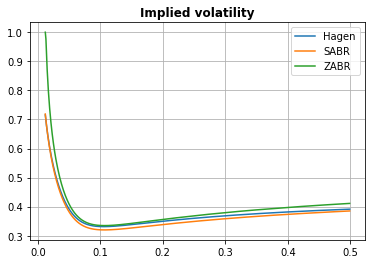

In [11]:
#d_file("swapvalue", swap_ml, "Tenor basis (z%) in 10 years")

# =============================================================================
# 3.2
# =============================================================================

hagen = []
SABR = []
ZABR = []
index = np.arange(12,500)/1000
for i in index:
    hagen.append(vol(K=i))
    SABR.append(log_normal(K=i))
    ZABR.append(Zabr(i))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
l1, = plt.plot(index, hagen, label='Hagen')
l2, = plt.plot(index, SABR, label='SABR')
l3, = plt.plot(index, ZABR, label='ZABR')
ax1.legend()
ax1.grid()
ax1.set_title('Implied volatility', fontweight='bold')
plt.show()

#plt.plot(index, hagen)
#plt.plot(index,SABR)
#plt.plot(index, ZABR)

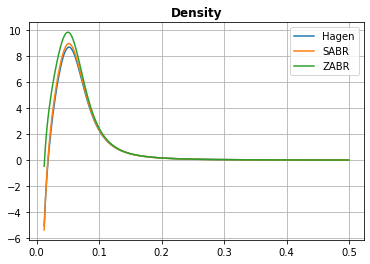

In [13]:
hagen_d = []
SABR_d = []
ZABR_d = []
for i in index:
    hagen_d.append(dens2(vol,K=i))
    SABR_d.append(dens2(log_normal,K=i))
    ZABR_d.append(dens(Zabr_price,K=i))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
l1, = plt.plot(index, hagen_d, label='Hagen')
l2, = plt.plot(index, SABR_d, label='SABR')
l3, = plt.plot(index, ZABR_d, label='ZABR')
ax1.legend()
ax1.grid()
ax1.set_title('Density', fontweight='bold')
plt.show()

#plt.plot(index, hagen_d)
#plt.plot(index,SABR_d)
#plt.plot(index, ZABR_d)

When the models are out of the money, the model present negative values for the density which means arbitrage opportunities. 

A SABR model calibration of the parameters $\rho$, $\epsilon$, and $\sigma_{0}$ are performed in the next block. The calibrated curve consider $\beta = 0.6$. 

In [14]:
Market_strike = np.array([0.03, 0.035, 0.03999, 0.045, 0.05])
Market_quote = np.array([0.257, 0.222, 0.199, 0.189, 0.209])

initial_kick = np.array([0.08,0.5,-0.4])

centre = sco.leastsq(opt, initial_kick, (Market_quote, Market_strike, 0.6))[0]


a = pd.DataFrame(columns=['Calibrated', 'Uncalibrated'], index= ["$\rho$", "$\epsilon$", "$\sigma_{0}$"])
a['Calibrated'] = centre
a['Uncalibrated'] = np.array([-0.46, 0.44, 0.085])
a



,Calibrated,Uncalibrated
$\rho$,0.054346,-0.460
$\epsilon$,0.887963,0.440
$\sigma_{0}$,-0.132496,0.085


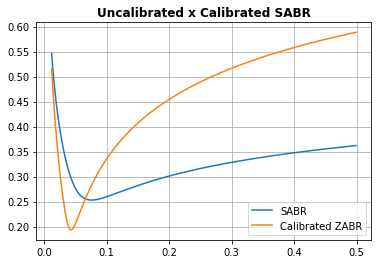

In [15]:
SABR = []
SABRC = []
for i in index:
    SABR.append(log_normal(K=i, beta = 0.6))
    SABRC.append(log_normal(K=i, beta = 0.6, sigma0 = centre[0], epsilon = centre[1], rho = centre[2]))

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111)
l2, = plt.plot(index, SABR, label='SABR')
l3, = plt.plot(index, SABRC, label='Calibrated ZABR')
ax1.legend()
ax1.grid()
ax1.set_title('Uncalibrated x Calibrated SABR', fontweight='bold')
plt.show()

#plt.plot(index,SABR)
#plt.plot(index,SABRC)

# Swaptions

The Hull-White model:

$$ \frac{Z\left( t , T \right)}{Z\left( t , S \right)} = \frac{Z\left( 0 , T \right)}{Z\left( 0 , S \right)} e^{-0,5 V + \sqrt{V} \epsilon}, \epsilon \sim N \left( 0, 1 \right) $$

Where V is

$$ V = \left( \phi \left( T, K \right) - \phi \left( S, K \right) \right)^2 \frac{\sigma^2}{2K} e^{2K\left( Ttm \right)} $$

Ttm = time to maturity and $\phi$

$$ \phi \left( T, K \right) = \frac{1}{K}\left( 1 - e^{-KT} \right) $$

Setting $K = 0.05, \sigma = 0.01, t = 5, S = 5$ and $T = 10$, the option prices and the $95\%$ confidence
intervals calculated with 40000 simulation are

In [16]:
# =============================================================================
# Swaptions
# =============================================================================
swap_option(strike = 0.01,z_curve=z_curve)

#d_file("option", round(swap_option(strike = 0.01,z_curve=z_curve)*100,2), "Options price in percentage")

,price,Left Tail,Right Tail
Call,0.049365,0.048834,0.049897
Put,0.019788,0.019403,0.020173
